In [1]:
# Obviously
import pandas as pd
import numpy as np

# Plotting set-up
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rc
# Command to reset plot styles to default: mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use('seaborn-poster')
mpl.rcParams['font.family'] = 'serif'
% matplotlib inline

# Options
pd.set_option('display.height', 500)
pd.set_option('display.max_rows', 500)
data_folder = '../data/'

In [2]:
listings = pd.read_csv(data_folder + 'listings.csv')
venues = pd.read_csv(data_folder + 'venues.csv.gz')
real_estate = pd.read_csv(data_folder + 'real_estate.csv.gz')
# calendar = pd.read_csv(data_folder + 'calendar.csv.gz', parse_dates=True)
demographics = pd.read_csv(data_folder + 'demographics.csv')
econ_state = pd.read_csv(data_folder + 'econ_state.csv')

In [ ]:
demographics

In [3]:
listings['zipcode'] = listings['zipcode'].apply(lambda x: str(x).zfill(5))
real_estate['zipcode'] = real_estate['zipcode'].apply(lambda x: str(x).zfill(5))
demographics['zipcode'] = demographics['zipcode'].apply(lambda x: str(x).zfill(5))

In [ ]:
from pandas.api.types import is_numeric_dtype, is_datetime64_dtype
price_columns = ['price', 'weekly_price']
for col in price_columns:
    if not is_numeric_dtype(listings[col]):
        listings[col] = listings[col].str.replace('$', '')
        listings[col] = listings[col].str.replace(',', '')
        listings[col] = listings[col].astype(np.float64)

In [ ]:
import holoviews as hv
import geoviews as gv
import geoviews.feature as gf
import cartopy
from cartopy import crs as ccrs
from bokeh.tile_providers import STAMEN_TONER
from bokeh.models import WMTSTileSource

hv.notebook_extension('bokeh')
tiles = {'OpenMap': WMTSTileSource(url='http://c.tile.openstreetmap.org/{Z}/{X}/{Y}.png'),
         'ESRI': WMTSTileSource(url='https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{Z}/{Y}/{X}.jpg'),
         'Wikipedia': WMTSTileSource(url='https://maps.wikimedia.org/osm-intl/{Z}/{X}/{Y}@2x.png'),
         'Stamen Toner': STAMEN_TONER}

In [ ]:
type_counts = dict()
for t in venues.types:
    t2 = t[1:-1].split(', ')
    for t3 in t2:
        type_name = t3[1:-1]
        if type_name in type_counts:
            type_counts[type_name] += 1
        else:
            type_counts[type_name] = 1
type_counts

In [4]:
cap = 300
listings['price_cap'] = listings['price'].apply(lambda x: x if x < cap else cap)

TypeError: '<' not supported between instances of 'str' and 'int'

In [ ]:
%%opts Overlay [width=700 height=600] 
%%opts Points (size=0.1 cmap='viridis') [tools=['hover'] size_index=2 color_index=2 xaxis=None yaxis=None]
listings_ds = gv.Dataset(listings[listings['metropolitan'] == 'austin'], kdims=['price_cap', 'accommodates', 'zipcode'])
(gv.WMTS(tiles['Wikipedia']) *\
listings_ds.to(gv.Points, kdims=['longitude', 'latitude'],
              vdims=['price_cap', 'accommodates', 'zipcode'], crs=ccrs.PlateCarree()))

In [5]:
listings_cities = {'asheville': 'Asheville',
                   'austin': 'Austin',
                   'nashville': 'Nashville',
                   'new_orleans': 'New Orleans',
                   'new orleans': 'New Orleans',
                   'LA': 'Los Angeles',
                   'los angeles': 'Los Angeles'}
listings['metropolitan'] = listings['metropolitan'].apply(lambda x: listings_cities[x] if x in listings_cities else x)

In [6]:
listings['zipcode'] = listings['zipcode'].apply(lambda x: str(x).zfill(5))
airbnb_counts_per_zip = listings.groupby('zipcode').size()
airbnb_counts_per_zip = pd.DataFrame(airbnb_counts_per_zip).reset_index()
airbnb_counts_per_zip.columns = ['zipcode', 'airbnb_count']
airbnb_counts_per_zip.merge(demographics, on='zipcode')

,zipcode,airbnb_count,population,5_years_or_less,5-9_years,10-14_years,15-19_years,20-24_years,25-34_years,35-44_years,...,"$15,000-$24,999","$25,000-$34,999","$35,000-$49,999","$50,000-$74,999","$75,000-$99,999","$100,000-$150,000","$150,000-$199,999","$200,000_or_more",median_household_income,mean_household_income
0,37013,58,90073,7738,6449,5793,5540,6516,18478,14935,...,10.2,12.7,20.6,22.3,11.8,9.6,3.1,1.6,48423,60378
1,37015,2,18361,1224,1572,1086,1141,963,2085,2502,...,13.2,14.4,16.5,19.5,13.2,11,1.7,0.6,47253,55871
2,37027,19,53242,3147,4130,4314,4381,1882,4475,7853,...,2.6,4.2,7.3,12.3,10.9,20.9,11.6,27.6,119570,168343
3,37029,2,5484,252,303,369,312,214,577,755,...,5.8,6.2,13.7,21.8,15.7,18.3,4.6,8.6,70907,92858
4,37072,11,31392,1876,1766,1711,1868,1607,4401,3681,...,9.9,10.4,13.4,22,15.5,14.5,3.3,1.6,57846,67419
5,37076,54,37749,3276,2368,2022,1330,2742,7765,4797,...,9.8,13,16,22.6,14.3,11.7,2.7,1.5,52193,62153
6,37080,4,7079,388,278,287,413,212,776,795,...,12.8,10.4,15,18.9,12.4,18.2,1,2.8,54611,65632
7,37115,40,39846,2954,2970,2550,2326,2546,6404,4966,...,15.7,14.2,17.8,17.5,8.7,4.6,1.7,0.7,35758,45942
8,37122,1,51660,3588,3940,3676,3514,2181,5703,7836,...,7.1,6.4,12.2,20.7,17.7,19.7,7.6,5,74866,88803
9,37138,20,23408,1340,1269,1631,1255,1287,2653,3504,...,7.7,10,12.9,18.9,18.2,13.8,4.1,3.8,58849,76599


In [ ]:
%%opts Overlay [width=700 height=600] 
%%opts Points (size=0.1 cmap='viridis') [tools=['hover'] size_index=2 color_index=2 xaxis=None yaxis=None]
listings_ds = gv.Dataset(venues[listings['metropolitan'] == 'austin'], kdims=['price', 'accommodates', 'zipcode'])
(gv.WMTS(tiles['Wikipedia']) *\
listings_ds.to(gv.Points, kdims=['longitude', 'latitude'],
              vdims=['price', 'accommodates', 'zipcode'], crs=ccrs.PlateCarree()))

In [ ]:
real_estate

In [7]:
listings['zipgroup'] = listings['zipcode'].apply(lambda x: str(x[:3]))

In [ ]:
demographics.sort_values('population', ascending=False)

In [ ]:
demographics['zipcode'] = demographics['zipcode'].apply(lambda x: str(x).zfill(5))

In [20]:
demographics = demographics[~(demographics['$9,999_or_less'] == '-')]
print(len(demographics))

income_cols = {'$9,999_or_less': 5000,
               '$10,000-$14,999': 12500,
               '$15,000-$24,999': 20000,
               '$25,000-$34,999': 30000,
               '$35,000-$49,999': 42500,
               '$50,000-$74,999': 62500,
               '$75,000-$99,999': 82500,
               '$100,000-$150,000': 125000,
               '$150,000-$199,999': 175000,
               '$200,000_or_more': 225000}
for col, income in income_cols.items():
    demographics[col] = demographics[col].astype(float)

32549


In [30]:
def gini_row(x):
    mu = sum(x[col]*income*0.01 for col, income in income_cols.items())
    from itertools import combinations
    gini_sum = 0
    for i,j in combinations(income_cols.keys(), 2):
        gini_sum += x[i]*x[j]*0.0001*np.abs(income_cols[i]-income_cols[j])
    gini = gini_sum*((1/mu))
    return gini
demographics['gini'] = demographics.apply(gini_row, axis=1)

In [22]:
listing_zips = listings['zipcode'].unique()
listing_demographics = demographics[demographics['zipcode'].isin(listing_zips)]
listing_demographics[['zipcode', 'gini']].sort_values('gini', ascending=False)

,zipcode,gini
30029,90021,0.299010
30021,90013,0.288497
24150,70113,0.287229
30022,90014,0.276551
24149,70112,0.275402
30025,90017,0.268971
24161,70125,0.262514
30023,90015,0.262465
24153,70116,0.260397
24155,70118,0.258174


In [ ]:
real_estate_gini = real_estate[['zipcode', '2017-06']].merge(listing_demographics[['zipcode','gini']])
la_zips = listings[listings['metropolitan'] == 'Los Angeles']['zipcode'].unique()
real_estate_gini = real_estate_gini[real_estate_gini]
airbnb_zip_gini = airbnb_counts_per_zip.merge(listing_demographics[['zipcode','gini']])
plt.scatter(airbnb_zip_gini['airbnb_count'], airbnb_zip_gini['gini'])
plt.show()
plt.scatter(real_estate_gini['2017-06'], real_estate_gini['gini'])
plt.show()

In [ ]:
venues['city'] = venues['city'].apply(lambda x: listings_cities[x] if x in listings_cities else x)

In [ ]:
la_venues = venues[venues['city'] == 'Los Angeles']
la_listings = listings[listings['metropolitan'] == 'Los Angeles']

In [356]:
from math import radians, cos, sin, asin, sqrt
def haversine(lat1, lon1, lat2, lon2, r=1):
    if np.linalg.norm([lat1-lat2, lon1-lon2])/111 < 2*r:
        """
        Calculate the great circle distance between two points 
        on the earth (specified in decimal degrees)
        """
        # convert decimal degrees to radians 
        lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
        # haversine formula 
        dlon = lon2 - lon1 
        dlat = lat2 - lat1 
        a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
        c = 2 * asin(sqrt(a)) 
        # Radius of earth in kilometers is 6371
        km = 6371* c
        return km
    else:
        return 1000

In [ ]:
def split_venue_types(venue):
    venuetypes = venue['types']
    new_types = list()
    splits = venuetypes[1:-1].split(', ')
    for type_name in splits:
        new_types.append(type_name[1:-1])
    return new_types
venues['split_types'] = venues.apply(split_venue_types, axis=1)

In [ ]:
def count_near_venues(listing, type_venues, r=1):
    lat = listing['latitude']
    lon = listing['longitude']
    count = 0
    type_venues = type_venues[type_venues['city'] == listing['metropolitan']]
    for i, v in type_venues.iterrows():
        distance = haversine(lat, lon, v['latitude'], v['longitude'])
        if distance < r:
            count += 1
    return count

In [ ]:
from tqdm import tqdm, tqdm_notebook, tqdm_pandas
tqdm.pandas(tqdm_notebook)

In [ ]:
venues['split_types'].head()

In [ ]:
def venues_by_type(venue, venuetypes):
    venuetypes = set(venuetypes)
    venuetypes2 = set(venue['split_types'])
    return len(venuetypes.intersection(venuetypes2)) > 0

In [ ]:
nightlife = ['bar', 'casino', 'night_club']
nightlife_venues = venues.loc[venues.apply(lambda v: venues_by_type(v, nightlife), axis=1)]

In [ ]:
transit = ['bus_station', 'airport', 'car_rental', 'light_rail_station', 'subway_station', 'train_station', 'transit_station']
transit_venues = venues.loc[venues.apply(lambda v: venues_by_type(v, transit), axis=1)]
amusement = ['amusement_parks', 'art_gallery', 'aquarium', 'bowling_alley', \
             'casino', 'movie_theater', 'museum', 'zoo', 'stadium', 'shopping_mall']
amusement_venues = venues.loc[venues.apply(lambda v: venues_by_type(v, amusement), axis=1)]

In [9]:
la_listings = listings[listings['metropolitan'] == 'Los Angeles']

In [ ]:
la_nightlife_venues = nightlife_venues[nightlife_venues['city'] == 'Los Angeles']
la_listings['nightlife_count'] = la_listings.progress_apply(lambda x: count_near_venues(x, la_nightlife_venues, r=1), axis=1)

In [ ]:
listings['amusement_count'] = listings.progress_apply(lambda x: count_near_venues(x, amusement_venues, r=1), axis=1)

In [ ]:
listings['nightlife_count'].describe()

In [14]:
zip_lat_lon = pd.read_csv(data_folder + 'zip_lat_lon.csv')
zip_lat_lon.columns = ['zipcode', 'latitude', 'longitude']
interesting_zips = listings['zipcode'].unique()
zip_lat_lon['zipcode'] = zip_lat_lon['zipcode'].apply(lambda x: str(x).zfill(5))
zip_lat_lon = zip_lat_lon[zip_lat_lon['zipcode'].isin(interesting_zips)]

In [334]:
def zip_for_lat_lon(row):
    my_lat = row['latitude']
    my_lon = row['longitude']
    min_dist = 1000
    min_zip = None
    for i, ziprow in zip_lat_lon.iterrows():
        dist = haversine(ziprow['latitude'], ziprow['longitude'], my_lat, my_lon)
        if dist < min_dist:
            min_zip = ziprow['zipcode']
            min_dist = dist
    return str(int(min_zip)).zfill(5)

In [357]:
nightlife_venues['zipcode'] = nightlife_venues.progress_apply(zip_for_lat_lon, axis=1)

















  0%|          | 0/5145 [00:00<?, ?it/s]















  0%|          | 3/5145 [00:00<02:52, 29.78it/s]















  0%|          | 6/5145 [00:00<03:05, 27.69it/s]















  0%|          | 9/5145 [00:00<03:11, 26.80it/s]















  0%|          | 12/5145 [00:00<03:13, 26.57it/s]















  0%|          | 15/5145 [00:00<03:15, 26.28it/s]















  0%|          | 18/5145 [00:00<03:25, 25.00it/s]















  0%|          | 21/5145 [00:00<03:32, 24.13it/s]















  0%|          | 24/5145 [00:00<03:35, 23.75it/s]















  1%|          | 27/5145 [00:01<03:33, 23.98it/s]















  1%|          | 30/5145 [00:01<03:27, 24.66it/s]















  1%|          | 33/5145 [00:01<03:22, 25.23it/s]















  1%|          | 36/5145 [00:01<03:42, 22.93it/s]















  1%|          | 39/5145 [00:01<04:01, 21.10it/s]















  1%|          | 42/5145 [00:01<04:19, 19.70it/s]















  1%|          | 45/5

  3%|▎         | 170/5145 [00:08<03:57, 20.95it/s]















  3%|▎         | 173/5145 [00:08<03:43, 22.28it/s]















  3%|▎         | 176/5145 [00:09<03:33, 23.26it/s]















  3%|▎         | 179/5145 [00:09<03:28, 23.76it/s]















  4%|▎         | 182/5145 [00:09<03:29, 23.67it/s]















  4%|▎         | 185/5145 [00:09<03:23, 24.43it/s]















  4%|▎         | 188/5145 [00:09<03:17, 25.14it/s]















  4%|▎         | 191/5145 [00:09<03:12, 25.78it/s]















  4%|▍         | 194/5145 [00:09<03:10, 25.95it/s]















  4%|▍         | 197/5145 [00:09<03:10, 25.99it/s]















  4%|▍         | 200/5145 [00:10<03:08, 26.25it/s]















  4%|▍         | 203/5145 [00:10<03:08, 26.22it/s]















  4%|▍         | 206/5145 [00:10<03:05, 26.58it/s]















  4%|▍         | 209/5145 [00:10<03:07, 26.30it/s]















  4%|▍         | 212/5145 [00:10<03:09, 26.03it/s]















  4%|▍    

KeyboardInterrupt: 

In [358]:
nightlife_venues

,city,id,latitude,longitude,name,rating,types,split_types,zipcode
12,Asheville,8a50a84ee1e5349bdd09adf4644a590ff738588f,35.603342,-82.317979,The Black Bear Tavern,4.7,"['bar', 'restaurant', 'food', 'point_of_intere...","[bar, restaurant, food, point_of_interest, est...",37122
20,Asheville,84cacd1623d9c867d5249cbaf7c3099f140b15d2,35.616766,-82.320500,Black Mountain Ale House,4.3,"['restaurant', 'bar', 'food', 'point_of_intere...","[restaurant, bar, food, point_of_interest, est...",37122
21,Asheville,74ff91481fc60fb3ef95f89753956a13921cd288,35.617149,-82.319755,Berliner Kindl German Restaurant,4.6,"['bar', 'restaurant', 'food', 'store', 'point_...","[bar, restaurant, food, store, point_of_intere...",37122
29,Asheville,095a85c3e390af729f6fac66cb12a83702c7ac13,35.616737,-82.321134,Trail Head Restaurant & Bar,4.4,"['bar', 'restaurant', 'food', 'point_of_intere...","[bar, restaurant, food, point_of_interest, est...",37122
53,Asheville,735c67822f7045d1ec6ad86ca72912b86336cbff,35.600835,-82.397506,Native Kitchen and Social Pub,4.5,"['meal_takeaway', 'bar', 'restaurant', 'food',...","[meal_takeaway, bar, restaurant, food, point_o...",37122
83,Asheville,3f0a124323d62655719c5e32a977a746b79e4721,35.551155,-82.471390,Nachos & Beer,4.3,"['restaurant', 'bar', 'liquor_store', 'food', ...","[restaurant, bar, liquor_store, food, store, p...",37122
89,Asheville,e9b892836b951455b26bb349296e4e9f10587e83,35.587134,-82.486511,East Village Grille,4.3,"['bar', 'restaurant', 'food', 'point_of_intere...","[bar, restaurant, food, point_of_interest, est...",37122
92,Asheville,81c100797349d7ec8732f17d9e3152e94ea3c114,35.587852,-82.490948,The Social,4.4,"['restaurant', 'bar', 'food', 'point_of_intere...","[restaurant, bar, food, point_of_interest, est...",37122
93,Asheville,e3a95cbccab8a01a90e887a3c8879df6a85e8335,35.584181,-82.471618,Cocula Mexican Restaurant II,4.4,"['bar', 'restaurant', 'food', 'point_of_intere...","[bar, restaurant, food, point_of_interest, est...",37122
94,Asheville,9072801c6d758af09a394b9f6841ea3c058ee8e3,35.587090,-82.486813,Post 70 Indulgence Bar,4.9,"['bar', 'restaurant', 'food', 'point_of_intere...","[bar, restaurant, food, point_of_interest, est...",37122


In [365]:
nightlife_zip_counts = nightlife_venues.groupby('zipcode').count()['id'].reset_index()
nightlife_zip_counts.columns = ['zipcode', 'nightlife_count']
nightlife_zip_counts.to_csv('nightlife_zip_counts.csv')

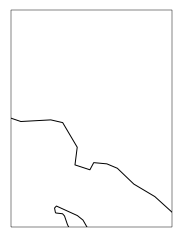

In [17]:
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
file = data_folder + 'cb_2016_us_zcta510_500k.shp'
ax = plt.axes(projection=ccrs.GOOGLE_MERCATOR)
ax.coastlines(resolution='50m')
ax.set_extent([la_listings['longitude'].min(), la_listings['longitude'].max(),
               la_listings['latitude'].min(), la_listings['latitude'].max()], crs=ccrs.PlateCarree())

KeyboardInterrupt: 

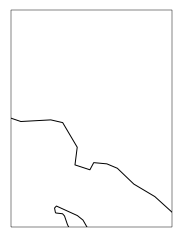

In [11]:
regions = ShapelyFeature(Reader(file).geometries(), ccrs.PlateCarree(), facecolor='grey')

ax.add_feature(regions)

In [13]:
zips = list(zip_lat_lon['zipcode'])
zip_regions = dict()
for rec in Reader(file).records():
    zipcode = rec.attributes['ZCTA5CE10']
    if zipcode in zips:
        zip_regions[zipcode] = rec.geometry
        print('adding', zipcode)

NameError: name 'zip_lat_lon' is not defined

In [417]:
demand_dims = pd.read_csv(data_folder + 'demand_dimensions.csv')
demand_dims['zipcode'] = demand_dims['zipcode'].apply(lambda x: str(x).zfill(5))

In [411]:
import matplotlib
norm = matplotlib.colors.Normalize(vmin=0, vmax=50)
cmap = plt.cm.gray_r

In [427]:
demand_dims = demand_dims[demand_dims['airbnb_10khousehold'] != '#DIV/0!']
demand_dims['airbnb_10khousehold'].describe()

count             401
unique            401
top       0.747778658
freq                1
Name: airbnb_10khousehold, dtype: object

In [ ]:
font = {'size': 36}
matplotlib.rc('font', **font)

In [6]:
# Obviously
import pandas as pd
import numpy as np

# Plotting set-up
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rc
# Command to reset plot styles to default: mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use('seaborn-poster')
mpl.rcParams['font.family'] = 'serif'
% matplotlib inline

# Options
pd.set_option('display.height', 500)
pd.set_option('display.max_rows', 500)
data_folder = '../data/'
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
import cartopy
import matplotlib

listings = pd.read_csv(data_folder + 'listings.csv')
venues = pd.read_csv(data_folder + 'venues.csv.gz')
real_estate = pd.read_csv(data_folder + 'real_estate.csv.gz')
# calendar = pd.read_csv(data_folder + 'calendar.csv.gz', parse_dates=True)
demographics = pd.read_csv(data_folder + 'demographics.csv')
econ_state = pd.read_csv(data_folder + 'econ_state.csv')

listings['zipcode'] = listings['zipcode'].apply(lambda x: str(x).zfill(5))
real_estate['zipcode'] = real_estate['zipcode'].apply(lambda x: str(x).zfill(5))
demographics['zipcode'] = demographics['zipcode'].apply(lambda x: str(x).zfill(5))

listings_cities = {'asheville': 'Asheville',
                   'austin': 'Austin',
                   'nashville': 'Nashville',
                   'new_orleans': 'New Orleans',
                   'new orleans': 'New Orleans',
                   'LA': 'Los Angeles',
                   'los angeles': 'Los Angeles'}
listings['metropolitan'] = listings['metropolitan'].apply(lambda x: listings_cities[x] if x in listings_cities else x)

la_listings = listings[listings['metropolitan'] == 'Los Angeles']

demand_dims = pd.read_csv(data_folder + 'demand_dimensions.csv')
demand_dims['zipcode'] = demand_dims['zipcode'].apply(lambda x: str(x).zfill(5))
demand_dims = demand_dims[demand_dims['airbnb_10khousehold'] != '#DIV/0!']

zip_lat_lon = pd.read_csv(data_folder + 'zip_lat_lon.csv')
zip_lat_lon.columns = ['zipcode', 'latitude', 'longitude']
interesting_zips = listings['zipcode'].unique()
zip_lat_lon['zipcode'] = zip_lat_lon['zipcode'].apply(lambda x: str(x).zfill(5))
zip_lat_lon = zip_lat_lon[zip_lat_lon['zipcode'].isin(interesting_zips)]

zips = list(zip_lat_lon['zipcode'])
zip_regions = dict()
for rec in Reader(file).records():
    zipcode = rec.attributes['ZCTA5CE10']
    if zipcode in zips:
        zip_regions[zipcode] = rec.geometry

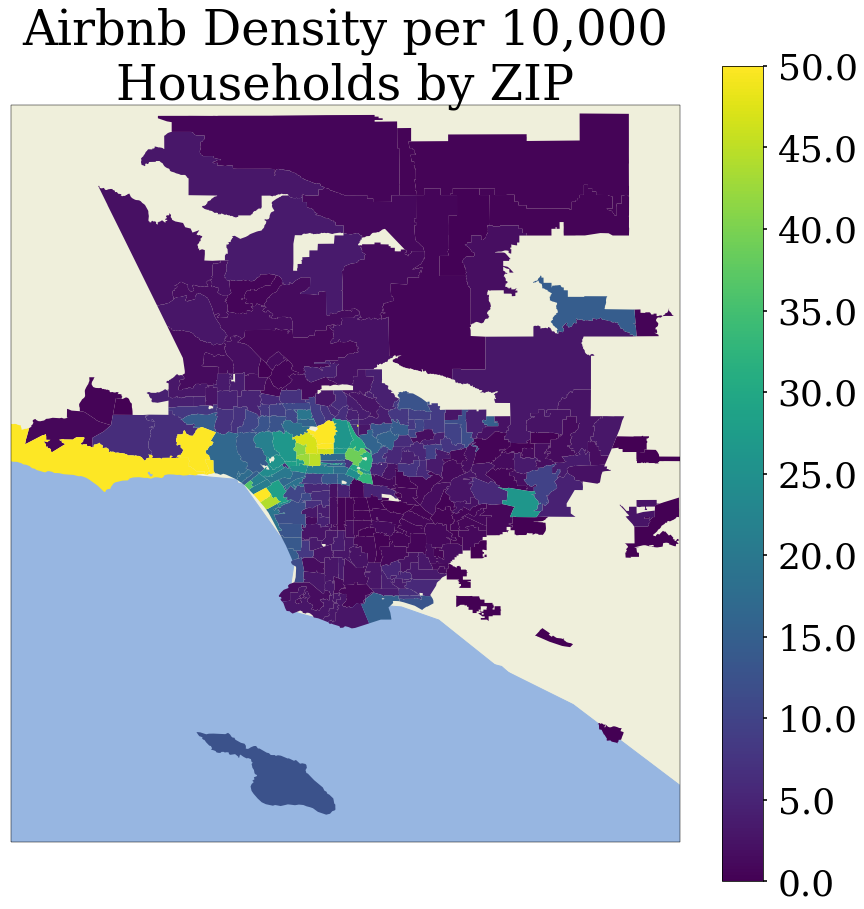

In [15]:
font = {'size': 36}
matplotlib.rc('font', **font)

file = data_folder + 'cb_2016_us_zcta510_500k.shp'
fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='10m')
ax.add_feature(cartopy.feature.NaturalEarthFeature('physical', 'land', '50m',
                               edgecolor='face',
                               facecolor=cartopy.feature.COLORS['land']))
ax.add_feature(cartopy.feature.NaturalEarthFeature('physical', 'ocean', '50m',
                               edgecolor='face',
                               facecolor=cartopy.feature.COLORS['water']))
ax.add_feature(cartopy.feature.OCEAN)
ax.set_extent([la_listings['longitude'].min()-0.1, la_listings['longitude'].max()+0.1,
               la_listings['latitude'].min()-0.1, la_listings['latitude'].max()+0.1], crs=ccrs.PlateCarree())

data_bounds = np.linspace(0, 50, 11)

norm = matplotlib.colors.Normalize(vmin=np.min(data_bounds), vmax=np.max(data_bounds))
cmap = plt.cm.viridis

for i, row in demand_dims.iterrows():
    zipcode = demand_dims['zipcode'][i]
    demand = demand_dims['airbnb_10khousehold'][i]
    if zipcode not in zip_regions:
        continue
    ax.add_feature(ShapelyFeature(zip_regions[zipcode], ccrs.PlateCarree(),
                                  facecolor=cmap(norm(float(demand)))))

sm = plt.cm.ScalarMappable(cmap=cmap)
sm._A = []
cb = plt.colorbar(sm)
cb.set_ticks(data_bounds/np.max(data_bounds))
cb.set_ticklabels(data_bounds)
cb.ax.tick_params(labelsize=36)
plt.title("Airbnb Density per 10,000\nHouseholds by ZIP", fontsize=48)
plt.show()

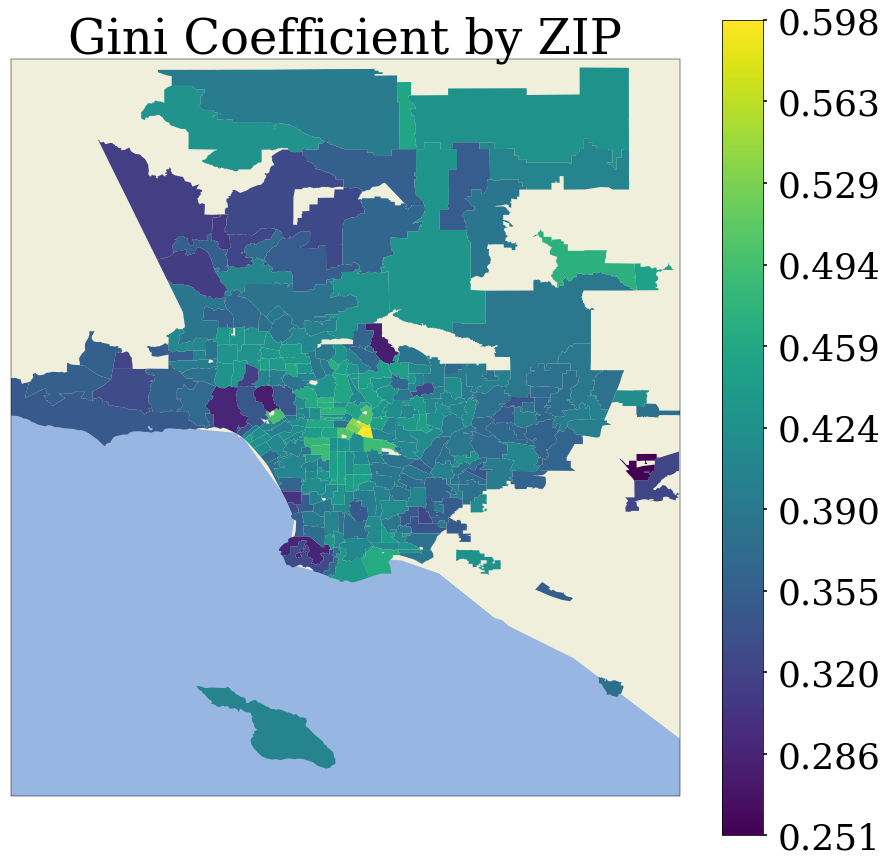

In [33]:
font = {'size': 36}
matplotlib.rc('font', **font)

file = data_folder + 'cb_2016_us_zcta510_500k.shp'
fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='10m')
ax.add_feature(cartopy.feature.NaturalEarthFeature('physical', 'land', '50m',
                               edgecolor='face',
                               facecolor=cartopy.feature.COLORS['land']))
ax.add_feature(cartopy.feature.NaturalEarthFeature('physical', 'ocean', '50m',
                               edgecolor='face',
                               facecolor=cartopy.feature.COLORS['water']))
ax.add_feature(cartopy.feature.OCEAN)
ax.set_extent([la_listings['longitude'].min()-0.1, la_listings['longitude'].max()+0.1,
               la_listings['latitude'].min()-0.1, la_listings['latitude'].max()+0.1], crs=ccrs.PlateCarree())

data_bounds = np.linspace(2*listing_demographics['gini'].min(), 2*listing_demographics['gini'].max(), 11)

norm = matplotlib.colors.Normalize(vmin=np.min(data_bounds), vmax=np.max(data_bounds))
cmap = plt.cm.viridis

for i, row in listing_demographics.iterrows():
    zipcode = listing_demographics['zipcode'][i]
    demand = 2*listing_demographics['gini'][i]
    if zipcode not in zip_regions:
        continue
    ax.add_feature(ShapelyFeature(zip_regions[zipcode], ccrs.PlateCarree(),
                                  facecolor=cmap(norm(float(demand)))))

sm = plt.cm.ScalarMappable(cmap=cmap)
sm._A = []
cb = plt.colorbar(sm)
cb.set_ticks(np.linspace(0, 1, len(data_bounds)))
cb.set_ticklabels(['{:.3f}'.format(tick) for tick in data_bounds])
cb.ax.tick_params(labelsize=36)
plt.title("Gini Coefficient by ZIP", fontsize=48)
plt.show()

In [38]:
listing_demographics['mean_household_income'] = listing_demographics['mean_household_income'].astype(float)

/home/bdice/anaconda3/envs/dice/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


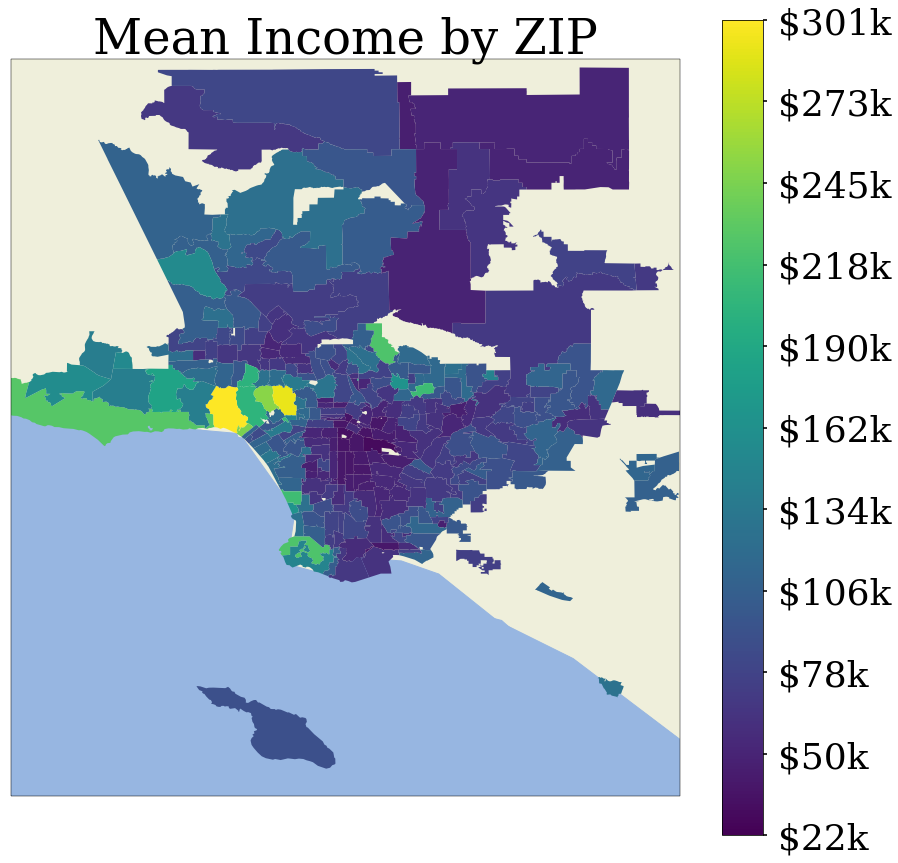

In [44]:
font = {'size': 36}
matplotlib.rc('font', **font)

file = data_folder + 'cb_2016_us_zcta510_500k.shp'
fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='10m')
ax.add_feature(cartopy.feature.NaturalEarthFeature('physical', 'land', '50m',
                               edgecolor='face',
                               facecolor=cartopy.feature.COLORS['land']))
ax.add_feature(cartopy.feature.NaturalEarthFeature('physical', 'ocean', '50m',
                               edgecolor='face',
                               facecolor=cartopy.feature.COLORS['water']))
ax.add_feature(cartopy.feature.OCEAN)
ax.set_extent([la_listings['longitude'].min()-0.1, la_listings['longitude'].max()+0.1,
               la_listings['latitude'].min()-0.1, la_listings['latitude'].max()+0.1], crs=ccrs.PlateCarree())

data_bounds = np.linspace(listing_demographics['mean_household_income'].min(),
                          listing_demographics['mean_household_income'].max(), 11)

norm = matplotlib.colors.Normalize(vmin=np.min(data_bounds), vmax=np.max(data_bounds))
cmap = plt.cm.viridis



for i, row in listing_demographics.iterrows():
    zipcode = listing_demographics['zipcode'][i]
    demand = listing_demographics['mean_household_income'][i]
    if zipcode not in zip_regions:
        continue
    ax.add_feature(ShapelyFeature(zip_regions[zipcode], ccrs.PlateCarree(),
                                  facecolor=cmap(norm(float(demand)))))

sm = plt.cm.ScalarMappable(cmap=cmap)
sm._A = []
cb = plt.colorbar(sm)
cb.set_ticks(np.linspace(0, 1, len(data_bounds)))
cb.set_ticklabels(['${:.3g}k'.format(np.round(tick/1000)) for tick in data_bounds])
cb.ax.tick_params(labelsize=36)
plt.title("Mean Income by ZIP", fontsize=48)
plt.show()